# *LIBRETA 2: preparación de los datos para el entrenamiento*
---

El objetivo de esta libreta es generar un archivo con el corpus ordenado.

Durante toda la libreta se usara *Matplotlib* en su *filosofia orientada a objetos*.

In [2]:
%matplotlib inline
# Linea para ignorar los warnins, en su mayoria son respecto a operaciones con arreglos vacios.
import warnings
warnings.filterwarnings('ignore')


from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.lm.preprocessing import flatten
from nltk.tokenize import word_tokenize
from nltk import download
import re
    
#download()


## Exploratory Data Analisys
---
Lo primero es poder guardar nuestro corpus en una variable de python. Para esta tarea se ha creado una funcion que lee la informacion para del archivo 'conferencias_matutinas_matutinas_amlo(2018)', el cual es una muestra del texto en 'conferencias_matutinas_matutinas_amlo'. 

Con la finalidad de dejar el corpus lo mas *'crudo'* posible se ha tomado cada **renglon** como una **sentencia** con un solo **token**, la sentencia en si. Esto no es optimo pues una sentencia debe de ser un listado de tokens que en su conjunto forman una sola *idea*, lo cual no esta garantisado en el formato del *corpus crudo*. 

In [3]:
def Leer_corpus(path,nrows=-1):
    corpus_raw	= pd.DataFrame(columns=['sentencias'])
    if nrows > 0 :
        with open(path,'r',encoding="utf-8") as frame:
            contador = 0;
            for linea in frame:
                if contador == nrows :
                    break
                auxiliar = pd.DataFrame( [linea],columns=['sentencias'])
                corpus_raw = pd.concat( [corpus_raw, auxiliar ] ,ignore_index=True)
                contador=contador+1					
    else:
        with open(path,'r',encoding="utf-8") as frame:
            for linea in frame:
                auxiliar = pd.DataFrame( [linea],columns=['sentencias'])
                corpus_raw = pd.concat( [corpus_raw, auxiliar ] ,ignore_index=True)
    return corpus_raw

path ="./conferencias_matutinas_amlo(2018).txt"
corpus_crudo = Leer_corpus(path,3)

corpus_crudo.head()

,sentencias
0,Buenas tardes.\n
1,"Sí. Es que son buenos días, pero llegué tarde,..."
2,Y hoy nos acompañó la jefa de gobierno de la C...


### Objetivo: EDA
--- 
EDA nos permite visualizar la informacion para hacer nuestros propios descubrimientos( *insights* en ingles ). La probabilidad de hacer descubrimientos es proporcional a la capacidad que se tenga para visualizar la informacion. 

Nuestro objetivo es preprocesar el sentencias de diferentes maneras y aplicar un EDA sobre cada uno de estos **corpus prosesados**. Al final escojeremos el que mejor se ajuste a nuestra tarea y lo llamaremo **corpus ordenado**. El *corpus prosesado* se asume que cada  elemento es una *sentencia*, a su ves cada sentencia es un conjunto de *tokens*.

La finalidad del objeto *EDA_* es ser una recopilacion de herramientas para al final poder tener distintas metricas con las cuales comparar los derivados que se llegen a hacer del corpus crudo.

---
*EDA_PLN* Contiene herramientas para hacer 'exploratory data analisys'

*   dataframe: El corpus sobre el cual se efectuara el EDA 

In [4]:
class EDA_PLN():
	
	#El objeto obtiene el corpus en el formato lista de listas [ ['token' , 'token' ... 'token'] , ['token',token ...] , ...]
	def __init__(self,corpus) -> None:
		self.corpus	= corpus
		self.corpus_unidimensional = []
		for sentencia in self.corpus:
			for token in sentencia:
				self.corpus_unidimensional.append(token)

	#Toma el corpus y regresa la frecuencia de los n_grama
	def get_top_ngram(self, n_grams=1):
		gramas = (ngrams(self.corpus_unidimensional,n_grams))
		frecuencias = FreqDist( gramas  )
		return frecuencias.most_common(10)
		
	#Unica funcion que si funciona :D Tomen esta como ejemplo
	def Caracteres_por_sentencia(self,
			    eje = None,
			    tamano_titulo = 18,
			    tamano_ejes = 10,
			    titulo="Histograma de longitud por sentencias"):
		if eje is None:	
			presentacion ,eje = plt.subplots(1)


		eje.hist( list(map( lambda x : len(x)  , self.corpus )) )
		
		eje.set_title(titulo, fontsize = tamano_titulo)
		eje.set_ylabel("Frecuencia", fontsize = tamano_ejes)
		eje.set_xlabel("Longitud",fontsize = tamano_ejes)

	#Copia de 'caracteres_por_sentencia'
	def Palabras_por_sentencia(self,
			    eje = None,
			    tamano_titulo = 18,
			    tamano_ejes = 10,
			    titulo="Histograma de longitud por sentencias"):
		if eje is None:	
			presentacion ,eje = plt.subplots(1)


		eje.hist( list(map( lambda x : len(x)  , self.corpus )) )
		
		eje.set_title(titulo, fontsize = tamano_titulo)
		eje.set_ylabel("Frecuencia", fontsize = tamano_ejes)
		eje.set_xlabel("Longitud",fontsize = tamano_ejes)	

	#Depregated, no esta funcionando, lo fixeo despues
	def Longitud_promedio_de_palabras(self,
			    eje = None,
			    tamano_titulo = 18,
			    tamano_ejes = 10,
			    titulo="Longitud promedio de palabras por sentencias"):
		if eje is None:	
			presentacion ,eje = plt.subplots(1)

		eje.hist(self.corpus['sentencias'].str.split().apply(
			lambda x : [len(i) for i in x]).map(
			lambda x: np.mean(x)))
		
		eje.set_title(titulo, fontsize = tamano_titulo)
		eje.set_ylabel("Frecuencia", fontsize = tamano_ejes)
		eje.set_xlabel("Longitud",fontsize = tamano_ejes)

	#Depregated, no esta funcionando, lo fixeo despues
	def Palabras_mas_comunes(self,
			  	stopwords = {''},
			    eje = None,
			    tamano_titulo = 18,
			    tamano_ejes = 10,
			    titulo="Palabras mas comunes"):
		if eje is None:	
			presentacion ,eje = plt.subplots(1)
		
		palabras_relevantes = defaultdict(int)
		for key in self.frecuencias :
			if key not in stopwords:
				palabras_relevantes[key] = self.frecuencias[key]

		top=sorted(palabras_relevantes.items(), key=lambda x:x[1],reverse=True)[:10] 
		x,y=zip(*top)
		eje.bar(x,y)
		
		eje.set_title(titulo, fontsize = tamano_titulo)
		eje.set_ylabel("Frecuencia", fontsize = tamano_ejes)
		eje.set_xlabel("Longitud",fontsize = tamano_ejes)

	#Depregated, no esta funcionando, lo fixeo despues
	def Stopwords_mas_comunes(self,
			  	stopwords,
			    eje = None,
			    tamano_titulo = 18,
			    tamano_ejes = 10,
			    titulo="Stopwords mas comunes"):
		if eje is None:	
			presentacion ,eje = plt.subplots(1)
		
		palabras_relevantes = defaultdict(int)
		for key in self.frecuencias :
			if key in stopwords:
				palabras_relevantes[key] = self.frecuencias[key]

		top=sorted(palabras_relevantes.items(), key=lambda x:x[1],reverse=True)[:10] 
		x,y=zip(*top)
		eje.bar(x,y)
		
		eje.set_title(titulo, fontsize = tamano_titulo)
		eje.set_ylabel("Frecuencia", fontsize = tamano_ejes)
		eje.set_xlabel("Longitud",fontsize = tamano_ejes)

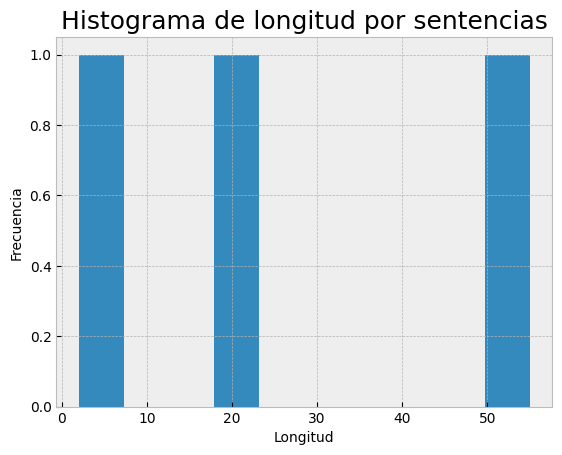

In [26]:
EDA_tokenizado_por_palabra = EDA_PLN(corpus_crudo['sentencias'].str.split())
EDA_corpus_crudo = EDA_PLN(corpus_crudo.values.tolist())

stop=set(stopwords.words('spanish'))

with plt.style.context('bmh'):
    EDA_tokenizado_por_palabra.Caracteres_por_sentencia()
    #print(EDA_Word_tokeniz.get_top_ngram(n_grams=2))
    
    #print(EDA_corpus_crudo.get_top_ngram(n_grams=1))

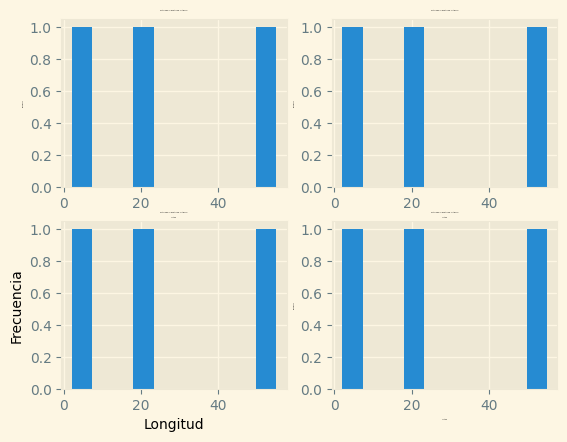

In [30]:
with plt.style.context('Solarize_Light2'):
    diagrama , graficas = plt.subplots(2,2)
    EDA_tokenizado_por_palabra.Palabras_por_sentencia(graficas[0,0],tamano_titulo=0,tamano_ejes=0)
    EDA_tokenizado_por_palabra.Palabras_por_sentencia(graficas[0,1],tamano_titulo=0,tamano_ejes=0)
    EDA_tokenizado_por_palabra.Palabras_por_sentencia(graficas[1,0],tamano_titulo=0)
    EDA_tokenizado_por_palabra.Palabras_por_sentencia(graficas[1,1],tamano_titulo=0,tamano_ejes=0)

#Prueba de concepto, algo asi se quiere hacer :b 


## Preprosesamiento 
---



In [24]:
print( corpus_crudo )

#Recuerda juve, el resutado debe de ser una lista de listas (un conjunto de sentencias), cada sentencia son varios tokens 
#  
def Procesamiento_1(corpus):
    corpus_preprocesado = corpus_crudo.values.tolist() # <- Una lista de listas(sublistas). Cada sublistas tiene solo un elemento.
    corpus_preprocesado = [ re.sub(r'\W',' ',sentencia[0]).split()  
                           for sentencia in corpus_preprocesado]
        
    return corpus_preprocesado

corpus_procesamiento_minimo = Procesamiento_1(corpus_crudo)
print(corpus_procesamiento_minimo)

                                          sentencias
0                                   Buenas tardes.\n
1  Sí. Es que son buenos días, pero llegué tarde,...
2  Y hoy nos acompañó la jefa de gobierno de la C...
[['Buenas', 'tardes'], ['Sí', 'Es', 'que', 'son', 'buenos', 'días', 'pero', 'llegué', 'tarde', 'porque', 'estábamos', 'tratando', 'temas', 'importantes', 'desde', 'luego', 'el', 'tema', 'de', 'la', 'seguridad'], ['Y', 'hoy', 'nos', 'acompañó', 'la', 'jefa', 'de', 'gobierno', 'de', 'la', 'Ciudad', 'de', 'México', 'estuvo', 'en', 'la', 'reunión', 'del', 'gabinete', 'de', 'seguridad', 'Y', 'también', 'se', 'atendió', 'el', 'Programa', 'de', 'Protección', 'a', 'Peregrinos', 'porque', 'ya', 'estamos', 'en', 'la', 'víspera', 'del', 'día', '12', 'y', 'vienen', 'peregrinos', 'del', 'país', 'por', 'las', 'carreteras', 'Y', 'se', 'habló', 'del', 'programa', 'de', 'protección']]
